# 2. Further EDA and Preprocessing

## 2.1 Imports

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

In [26]:
df = pd.read_csv('2.hotel_reviews_structured.csv')

In [27]:
df.head()

,hotel_name,review_summary,score,review
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...
1,Hilton London Metropole,Terrible,1,"Absolutely terrible. Cracked ceiling, tiny roo..."
2,Hilton London Euston,Double deposit taken from bank,1,Very disappointed firstly i checked in online ...
3,Hilton London Metropole,Super disappointed!,1,First of all we arrived wanting to park at the...
4,Hilton London Metropole,Dissatisfied Hilton gold number,1,"Hello, I currently staying @ Hilton Metropole..."


In [28]:
df.shape

(9405, 4)

## 2.2 Checking Frequency of Words and Phrases in Review Summaries

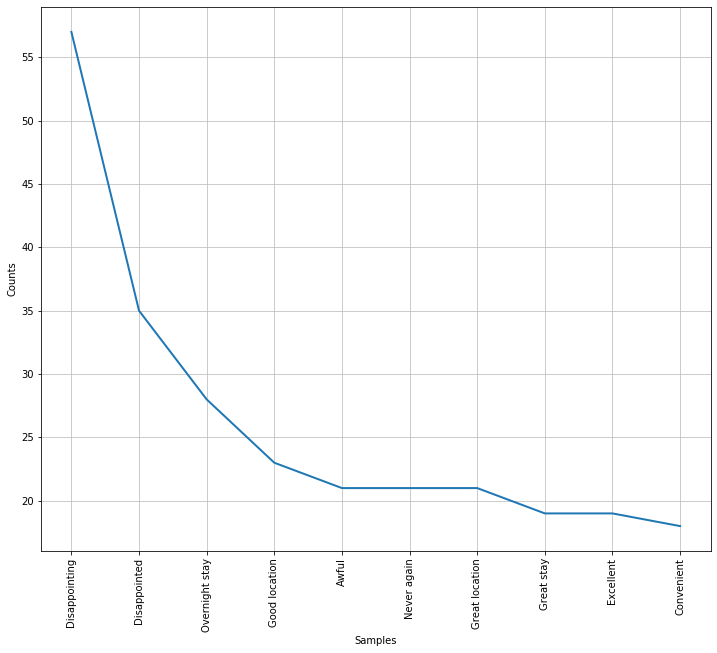

In [29]:
plt.figure(figsize=(12,10))
FreqDist(df['review_summary'].values.tolist()).plot(10)
plt.show()

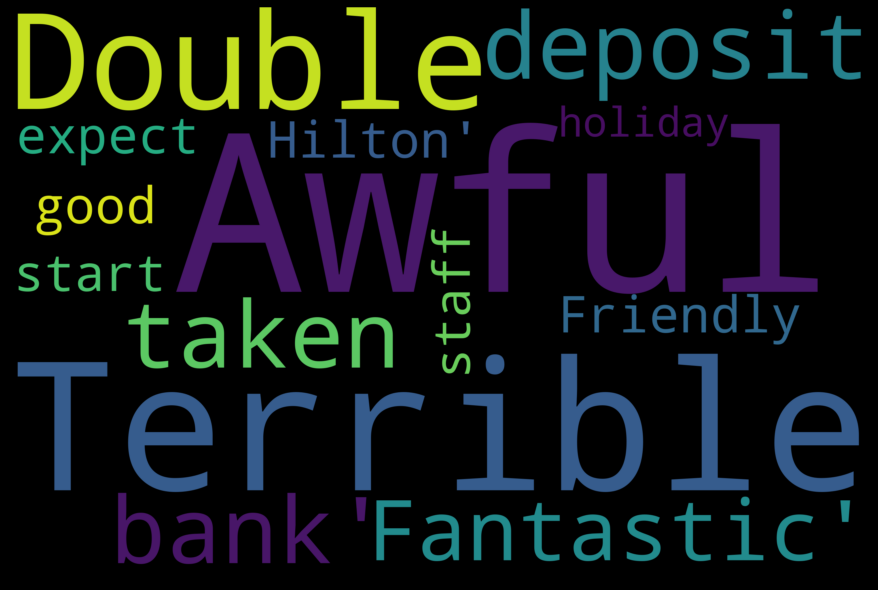

In [30]:
stop_words = stopwords.words("english")
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(str(df['review_summary'].values))

plt.figure(figsize = (12,12),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 2.3 Flattening Reviews to Check Word Frequency

In [31]:
df['review'][0:3].to_list()

["Its hard to find words that can describe this experience without being too dismissive so i'll keep it short.  Pros. - Check experience was fine.... The checkin clerk was funny and helpful, and had a lovely manner with the guests. Very efficient. - Location... Very well set for access to Gatwick airport, with a short walk to the terminal for your flights.  Cons - Food...  the hotel not only was packed full and the restaurants were full, but the food itself was incredibly poor and expensive.   We did the buffet... on the evening.... barely anything was truly good tasting..... AVOID - Comfort... Hiltons of late seem to be less and less comfortable, the rooms stark... and without any character. Not the cleanest of rooms either. - its a big hotel.... everywhere is a lengthy walk and its just all a bit 'run down'  Poor food, not the best night sleep, expensive for what it is, tired and in need of significant change.  AVOID!",
 'Absolutely terrible. Cracked ceiling, tiny room, bad quality t

In [32]:
flat_list_reviews = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+') 
tokenized_reviews = tokenizer.tokenize(str(df['review'].values))

for review in tokenized_reviews:
    flat_list_reviews.append(review.lower())

stop_words = stopwords.words("english")

flat_list_reviews = [word for word in flat_list_reviews if word not in stop_words]

## 2.4 Checking Frequency of Words and Phrases in Reviews

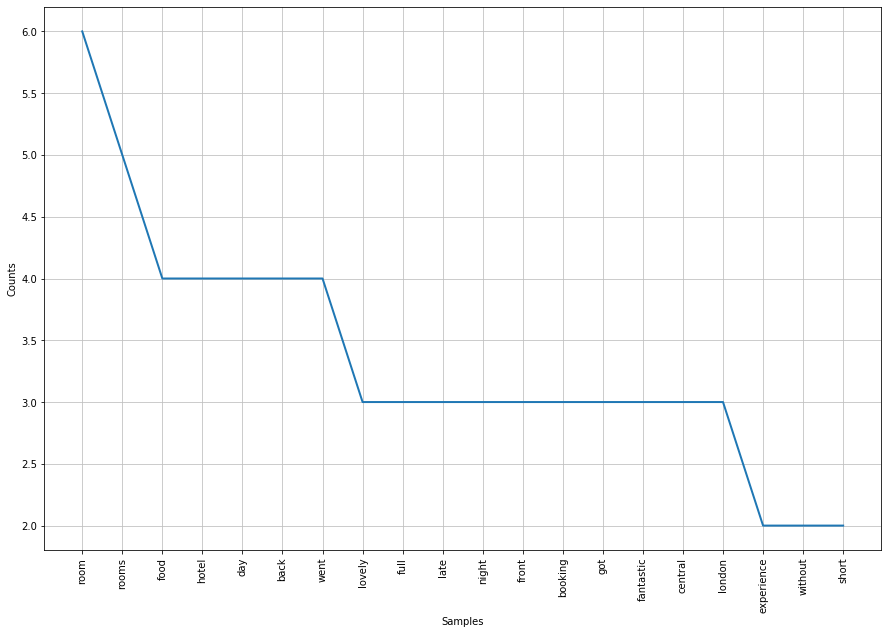

In [33]:
plt.figure(figsize=(15,10))
FreqDist(flat_list_reviews).plot(20)
plt.show()

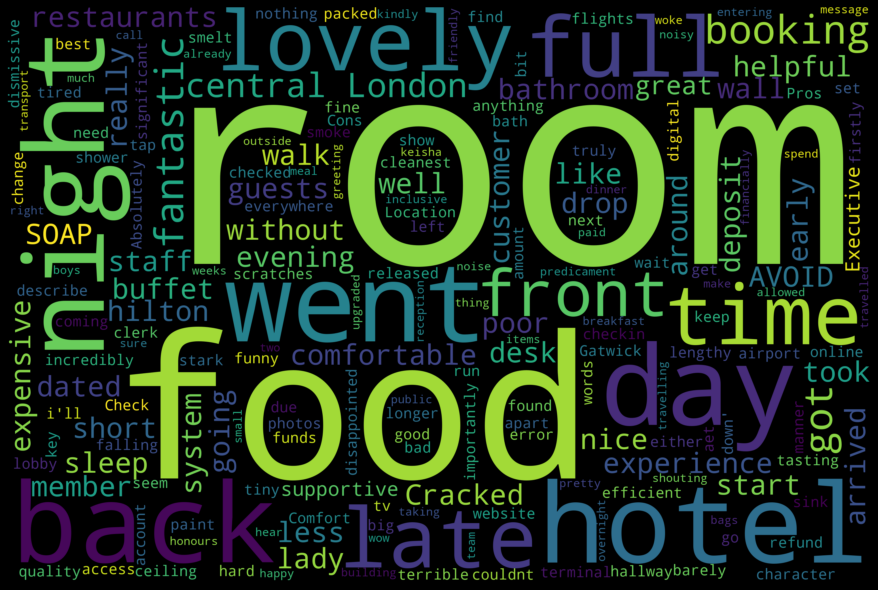

In [34]:
stop_words = stopwords.words("english")
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(str(df['review'].values))

plt.figure(figsize = (12,12),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 2.5 Stemming and Lemming

In [35]:
stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [36]:
def apply_stem(doc):
    
    doc_split = doc.split(' ')
    stem_doc = ''
    for word in doc_split:
        stem_doc += stemmer.stem(word) + ' '
        
    return stem_doc



def apply_lem(doc):
    
    doc_split = doc.split(' ')
    lem_v_doc = ''
    for word in doc_split:
        lem_v_doc += lemmy.lemmatize(word, pos='v') + ' '
        
    doc_split = lem_v_doc.split(' ')
    lem_doc = ''
    for word in doc_split:
        lem_doc += lemmy.lemmatize(word, pos='a') + ' '
        
    return lem_doc

In [37]:
df['review_stemmed'] = df['review'].apply(apply_stem)
df['review_lemmed'] = df['review'].apply(apply_lem)

df['review_summary_stemmed'] = df['review_summary'].apply(apply_stem)
df['review_summary_lemmed'] = df['review_summary'].apply(apply_lem)

In [62]:
review_index_to_check = 1013
print("ORIGINAL REVIEW SUMMARY:",'\n',df['review_summary'].iloc[review_index_to_check],'\n')
print("ORIGINAL REVIEW:",'\n',df['review'].iloc[review_index_to_check],'\n')
print("STEMMED REVIEW SUMMARY:",'\n',df['review_summary_stemmed'].iloc[review_index_to_check],'\n')
print("STEMMED REIVEW:",'\n',df['review_stemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW SUMMARY:",'\n',df['review_summary_lemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW:",'\n',df['review_lemmed'].iloc[review_index_to_check],'\n')

ORIGINAL REVIEW SUMMARY: 
 So disappointing 

ORIGINAL REVIEW: 
 Spent four nights here for a work event so in essence I didn't pay, work did. Nonetheless I felt if I was short changed. Don't expect a "Hilton" quality or service. This hotel is on a corner of a busy street which is hell if you're in an adjacent room. 1st room in the east wing fourth floor was awful. Very tired, cheap mattress, and facing the main road. It was a noisy and uncomfortable night. I asked to change rooms and was told I wound need to pack and bring my belongings to reception. They could have moved this for me!! Second room was a newer styled room but the cost saving was still apparent. Cheap mattress, cracked sink, holes in the wall and no hair dryer. This is not a high quality Hilton. Lesser prestigious hotels are providing better service with a higher quality.  

STEMMED REVIEW SUMMARY: 
 So disappoint  

STEMMED REIVEW: 
 spent four night here for a work event so in essenc I didn't pay, work did. nonetheles

In [39]:
df.head()

,hotel_name,review_summary,score,review,review_stemmed,review_lemmed,review_summary_stemmed,review_summary_lemmed
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...,it hard to find word that can describ thi expe...,Its hard to find word that can describe this e...,awful...,Awful...
1,Hilton London Metropole,Terrible,1,"Absolutely terrible. Cracked ceiling, tiny roo...","absolut terrible. crack ceiling, tini room, ba...","Absolutely terrible. Cracked ceiling, tiny roo...",terribl,Terrible
2,Hilton London Euston,Double deposit taken from bank,1,Very disappointed firstly i checked in online ...,veri disappoint firstli i check in onlin but h...,Very disappoint firstly i check in online but ...,doubl deposit taken from bank,Double deposit take from bank
3,Hilton London Metropole,Super disappointed!,1,First of all we arrived wanting to park at the...,first of all we arriv want to park at the hote...,First of all we arrive want to park at the hot...,super disappointed!,Super disappointed!
4,Hilton London Metropole,Dissatisfied Hilton gold number,1,"Hello, I currently staying @ Hilton Metropole...","hello, I current stay @ hilton metropol in lo...","Hello, I currently stay @ Hilton Metropole in...",dissatisfi hilton gold number,Dissatisfied Hilton gold number


## 2.6 Train Test Split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['hotel_name','score']), 
                                                    df['score'], 
                                                    test_size=.2, 
                                                    random_state=42)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7524, 6)
(1881, 6)
(7524,)
(1881,)


In [42]:
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
y_train_df.head()

,score
0,5
1,1
2,4
3,3
4,4


## 2.7 TF-IDF Vectorisation for Reviews

In [43]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                              tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, 
                              ngram_range=(1,3),
                              min_df = 0.05)
 
x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(x_train['review_lemmed'])

x_lemm_test_tfidf_sparse = tf_idf_vect.transform(x_test['review_lemmed'])


x_lemm_train_tfidf = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_test_tfidf = pd.DataFrame(x_lemm_test_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())


x_lemm_train_tfidf.head()

,access,air,airport,also,although,always,another,area,around,arrival,...,visit,wait,walk,want,water,way,well,wifi,work,would
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.281375,0.000000,0.16454,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.293977,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.190698
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.351077,0.0,0.0,0.000000,0.000000,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.0,0.0,0.149664,0.0,0.000000,0.0,0.0,0.000000,0.184566,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.147737,0.0,0.0,0.000000


## 2.8 TF-IDF Vectorisation for Review Summaries

In [44]:
tokenizer_summary = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect_summary = TfidfVectorizer(lowercase=True, 
                                      tokenizer = tokenizer_summary.tokenize, 
                                      stop_words=stop_words, 
                                      ngram_range=(1,3),
                                      min_df = 0.01)

x_lemm_train_summary_tfidf_sparse = tf_idf_vect_summary.fit_transform(x_train['review_summary_lemmed'])

x_lemm_test_summary_tfidf_sparse = tf_idf_vect_summary.transform(x_test['review_summary_lemmed'])


x_lemm_train_summary_tfidf = pd.DataFrame(x_lemm_train_summary_tfidf_sparse.toarray(), 
                                          columns=tf_idf_vect_summary.get_feature_names())

x_lemm_test_summary_tfidf = pd.DataFrame(x_lemm_test_summary_tfidf_sparse.toarray(), 
                                         columns=tf_idf_vect_summary.get_feature_names())


x_lemm_train_summary_tfidf.head()

,airport,airport hotel,average,awful,bad,bed,best,comfortable,convenient,disappoint,...,south,staff,standard,start,stay,terminal,terrible,tired,value,worst
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.550597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.9 Joining Reviews With Review Summaries

In [45]:
x_lemm_summary_text = x_lemm_train_summary_tfidf.join(x_lemm_train_tfidf, lsuffix='_sum')
x_lemm_summary_text.head()

,airport_sum,airport hotel,average,awful,bad_sum,bed_sum,best_sum,comfortable_sum,convenient_sum,disappoint,...,visit,wait,walk,want,water,way,well,wifi,work,would
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.293977,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.190698
2,0.550597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.147737,0.0,0.0,0.000000


In [46]:
x_lemm_summary_text.shape

(7524, 234)

## 2.10 Saving Preprocessed Dataset as a CSVs

In [47]:
x_lemm_summary_text.to_csv('3.x_train_data.csv',index=False)

In [48]:
y_train_df.to_csv('3.y_train_data.csv',index=False)